# **Apply the Random forest model on Glass dataset**

In [ ]:
#Importing Libraries & Data
# Loading the required Python libraries/packages

# For data loading and manipulation
import pandas as pd
import numpy as np
from sklearn import datasets

In [ ]:
# For Visualization/EDA
import seaborn as sns
sns.set(style="whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# For data science and machine learning techniques
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.svm import SVC

In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
# To create the interactive components
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Import dataset

glass_df = pd.read_excel("glass_data.xlsx")

In [ ]:
print(glass_df)

          RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Type
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0     1
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0     1
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0     1
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0     1
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0     1
..       ...    ...   ...   ...    ...   ...   ...   ...  ...   ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0     7
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0     7
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0     7
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0     7
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0     7

[214 rows x 10 columns]


In [ ]:
glass_df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [ ]:
glass_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [ ]:
glass_df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


# Exploratory Data Analyses

Text(0.5, 1.0, 'Count of Glass Types')

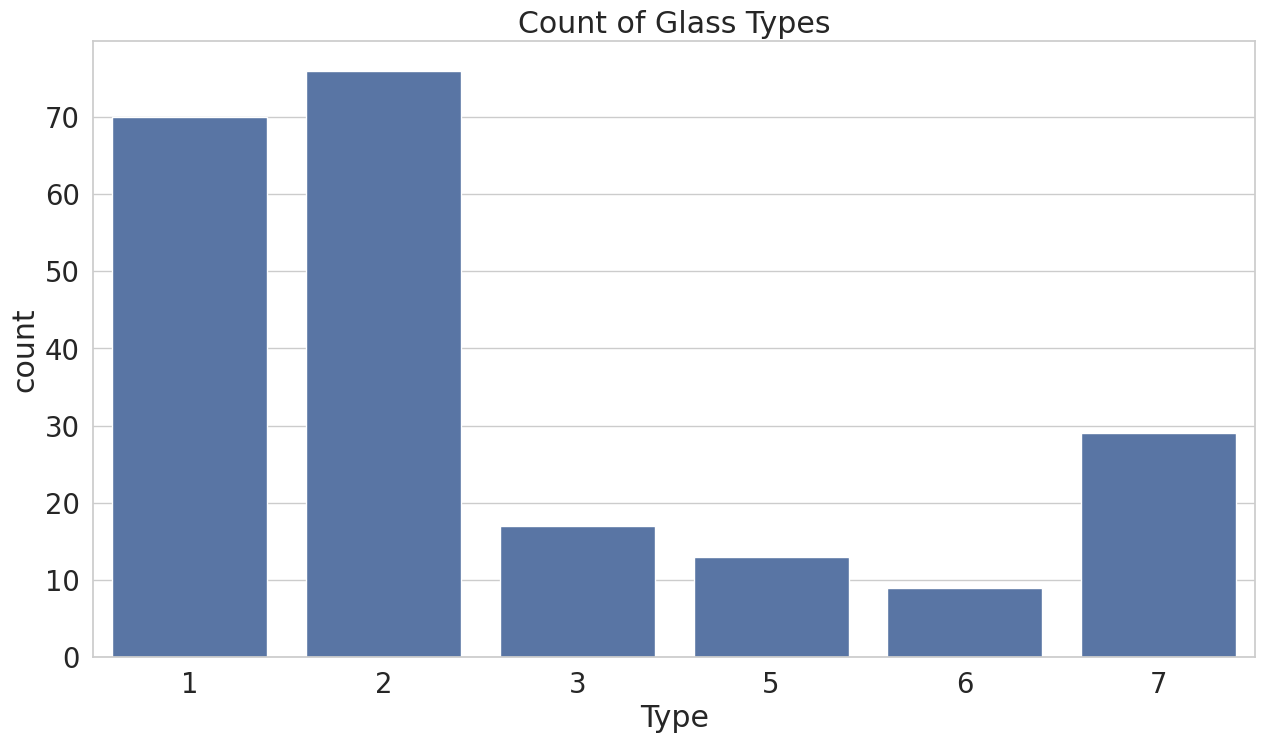

In [ ]:
sns.set(style="whitegrid", font_scale=1.8)
plt.subplots(figsize = (15,8))
sns.countplot(data=glass_df,x='Type').set_title('Count of Glass Types')

In [ ]:
# Checked both mean and median. mean seemed more informative
glass_df.groupby('Type', as_index=False).mean()

,Type,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1,1.518718,13.242286,3.552429,1.163857,72.619143,0.447429,8.797286,0.012714,0.057000
1,2,1.518619,13.111711,3.002105,1.408158,72.598026,0.521053,9.073684,0.050263,0.079737
2,3,1.517964,13.437059,3.543529,1.201176,72.404706,0.406471,8.782941,0.008824,0.057059
3,5,1.518928,12.827692,0.773846,2.033846,72.366154,1.470000,10.123846,0.187692,0.060769
4,6,1.517456,14.646667,1.305556,1.366667,73.206667,0.000000,9.356667,0.000000,0.000000
5,7,1.517116,14.442069,0.538276,2.122759,72.965862,0.325172,8.491379,1.040000,0.013448


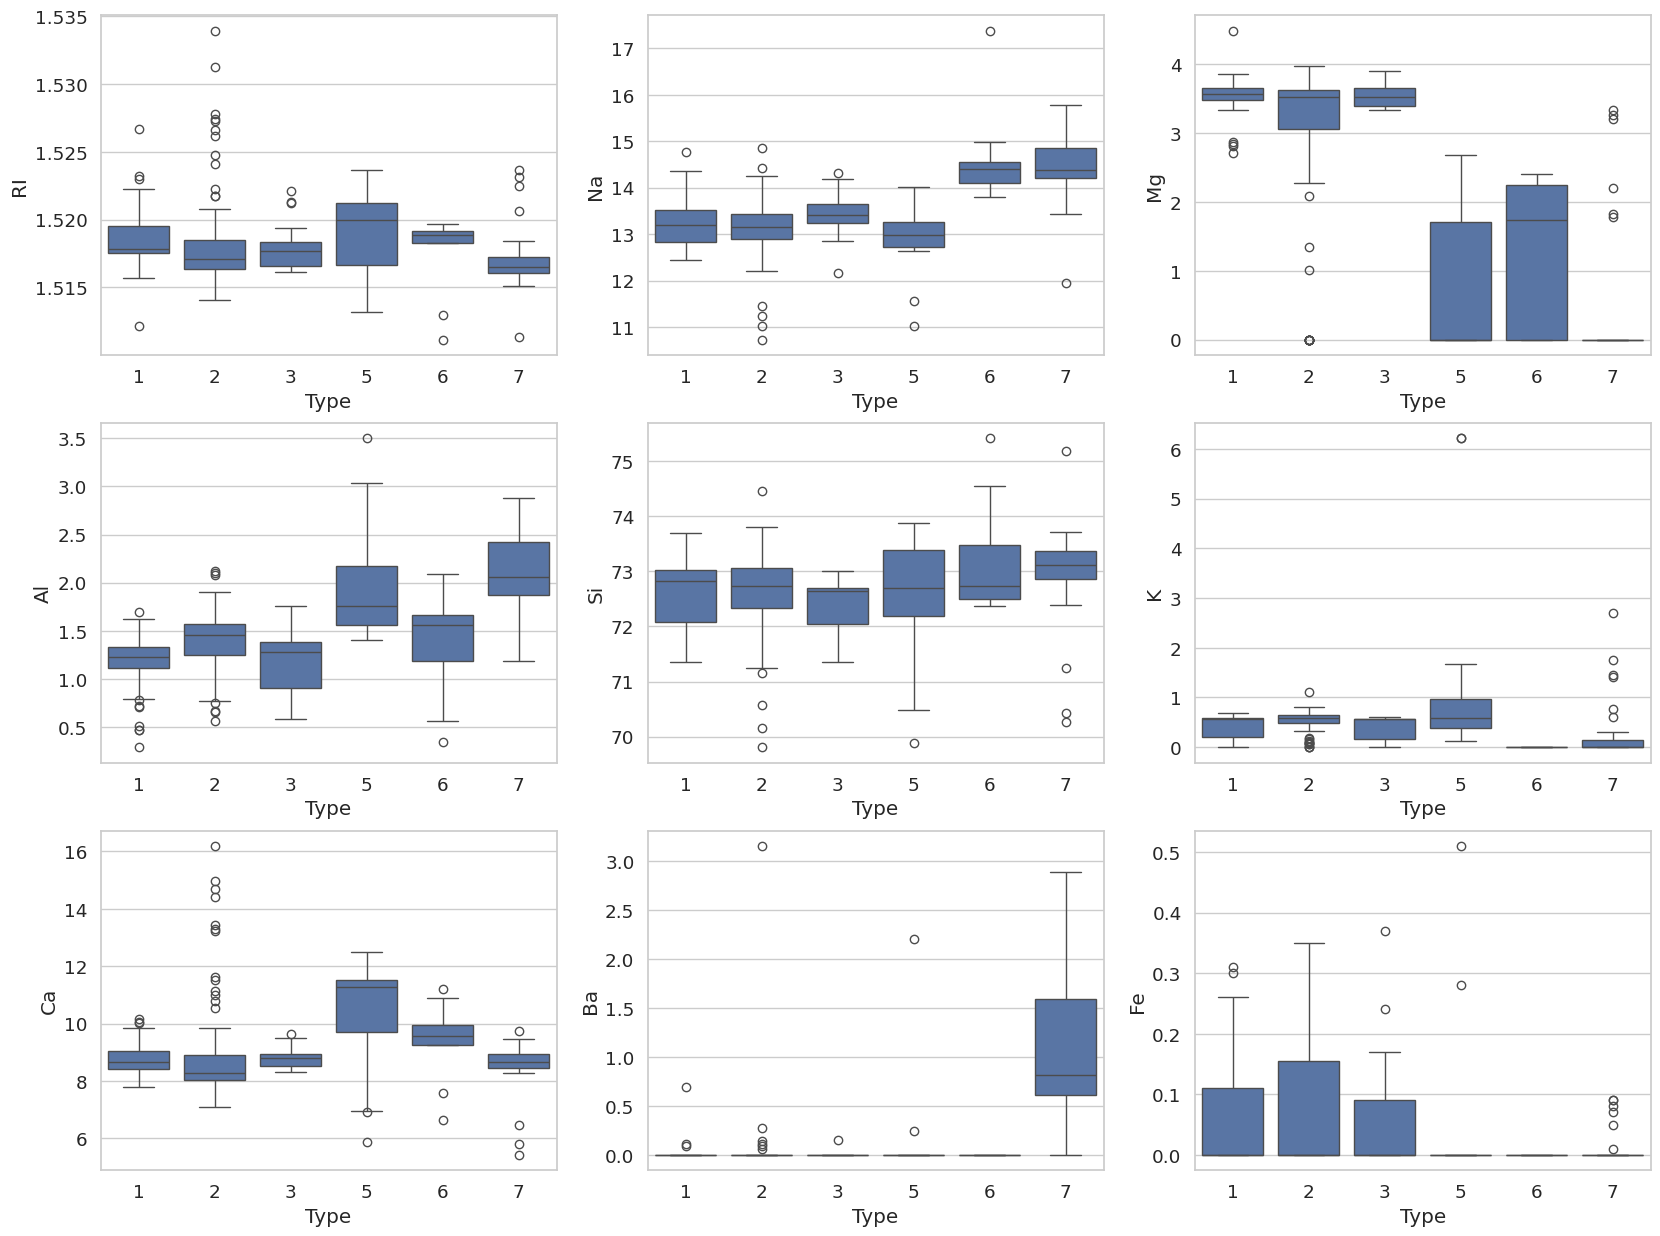

In [ ]:
sns.set(style="whitegrid", font_scale=1.2)
plt.subplots(figsize = (20,15))
plt.subplot(3,3,1)
sns.boxplot(x='Type', y='RI', data=glass_df)
plt.subplot(3,3,2)
sns.boxplot(x='Type', y='Na', data=glass_df)
plt.subplot(3,3,3)
sns.boxplot(x='Type', y='Mg', data=glass_df)
plt.subplot(3,3,4)
sns.boxplot(x='Type', y='Al', data=glass_df)
plt.subplot(3,3,5)
sns.boxplot(x='Type', y='Si', data=glass_df)
plt.subplot(3,3,6)
sns.boxplot(x='Type', y='K', data=glass_df)
plt.subplot(3,3,7)
sns.boxplot(x='Type', y='Ca', data=glass_df)
plt.subplot(3,3,8)
sns.boxplot(x='Type', y='Ba', data=glass_df)
plt.subplot(3,3,9)
sns.boxplot(x='Type', y='Fe', data=glass_df)
plt.show()

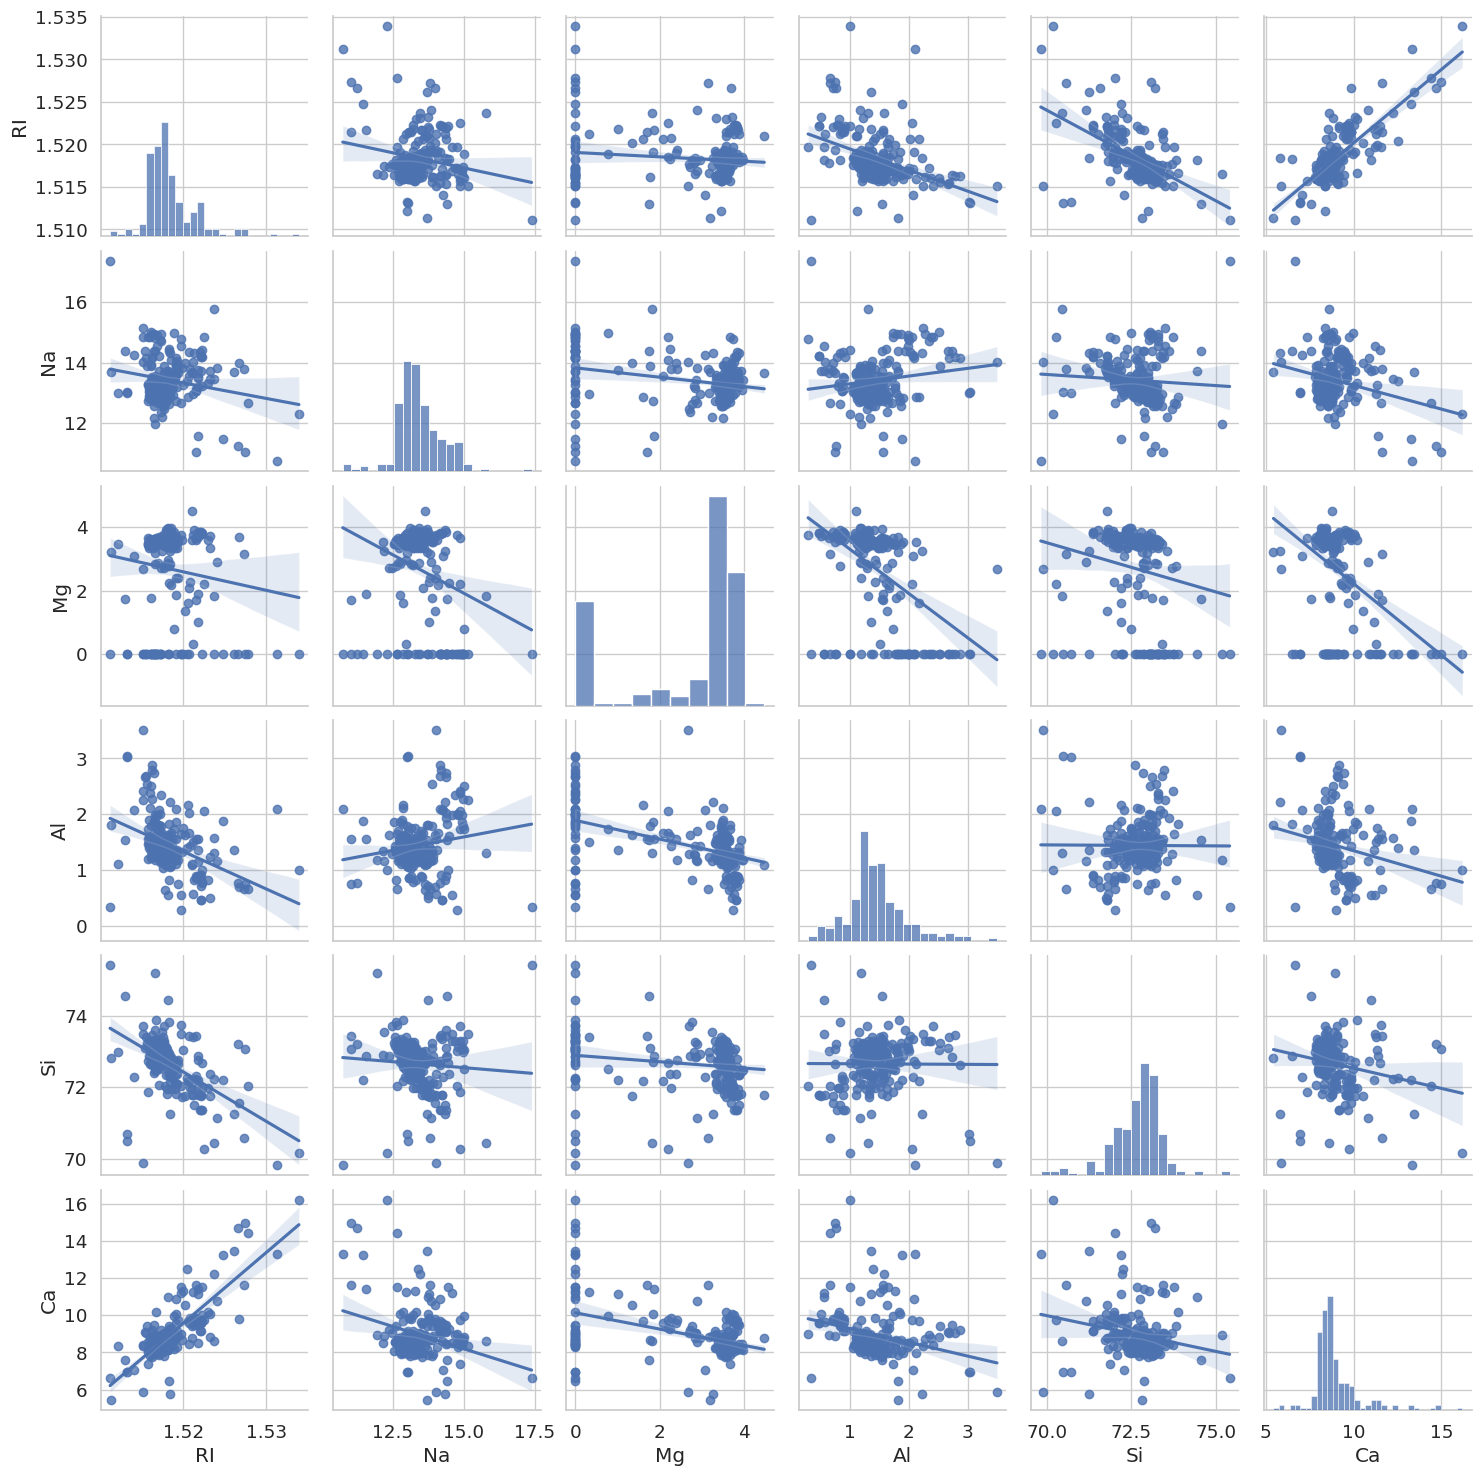

In [ ]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
sns.pairplot(glass_df[['RI','Na','Mg','Al','Si','Ca']], kind='reg')

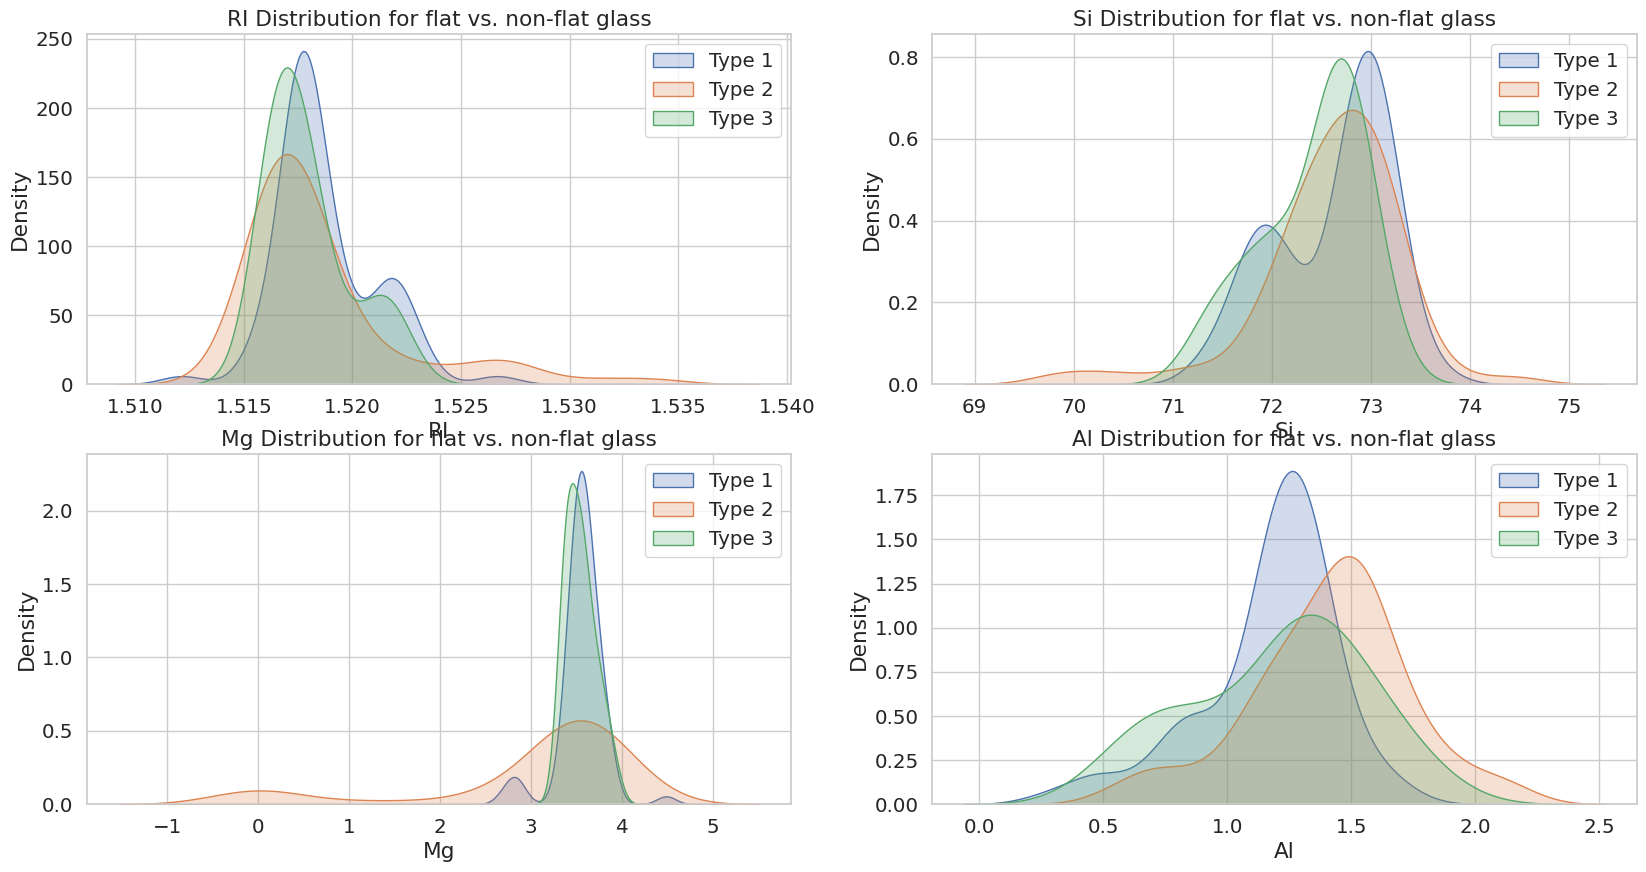

In [ ]:
sns.set(style="whitegrid", font_scale=1.3)
plt.subplots(figsize = (20,10))
plt.subplot(2,2,1)
sns.kdeplot(glass_df["RI"][glass_df.Type == 1], shade = True)
sns.kdeplot(glass_df["RI"][glass_df.Type == 2], shade = True)
sns.kdeplot(glass_df["RI"][glass_df.Type == 3], shade = True)
plt.title("RI Distribution for flat vs. non-flat glass")
plt.legend(['Type 1', 'Type 2', 'Type 3'])
plt.subplot(2,2,2)
sns.kdeplot(glass_df["Si"][glass_df.Type == 1], shade = True)
sns.kdeplot(glass_df["Si"][glass_df.Type == 2], shade = True)
sns.kdeplot(glass_df["Si"][glass_df.Type == 3], shade = True)
plt.title("Si Distribution for flat vs. non-flat glass")
plt.legend(['Type 1', 'Type 2', 'Type 3'])
plt.subplot(2,2,3)
sns.kdeplot(glass_df["Mg"][glass_df.Type == 1], shade = True)
sns.kdeplot(glass_df["Mg"][glass_df.Type == 2], shade = True)
sns.kdeplot(glass_df["Mg"][glass_df.Type == 3], shade = True)
plt.title("Mg Distribution for flat vs. non-flat glass")
plt.legend(['Type 1', 'Type 2', 'Type 3'])
plt.subplot(2,2,4)
sns.kdeplot(glass_df["Al"][glass_df.Type == 1], shade = True)
sns.kdeplot(glass_df["Al"][glass_df.Type == 2], shade = True)
sns.kdeplot(glass_df["Al"][glass_df.Type == 3], shade = True)
plt.title("Al Distribution for flat vs. non-flat glass")
plt.legend(['Type 1', 'Type 2', 'Type 3'])

# Feature Selection using PCA

<Axes: >

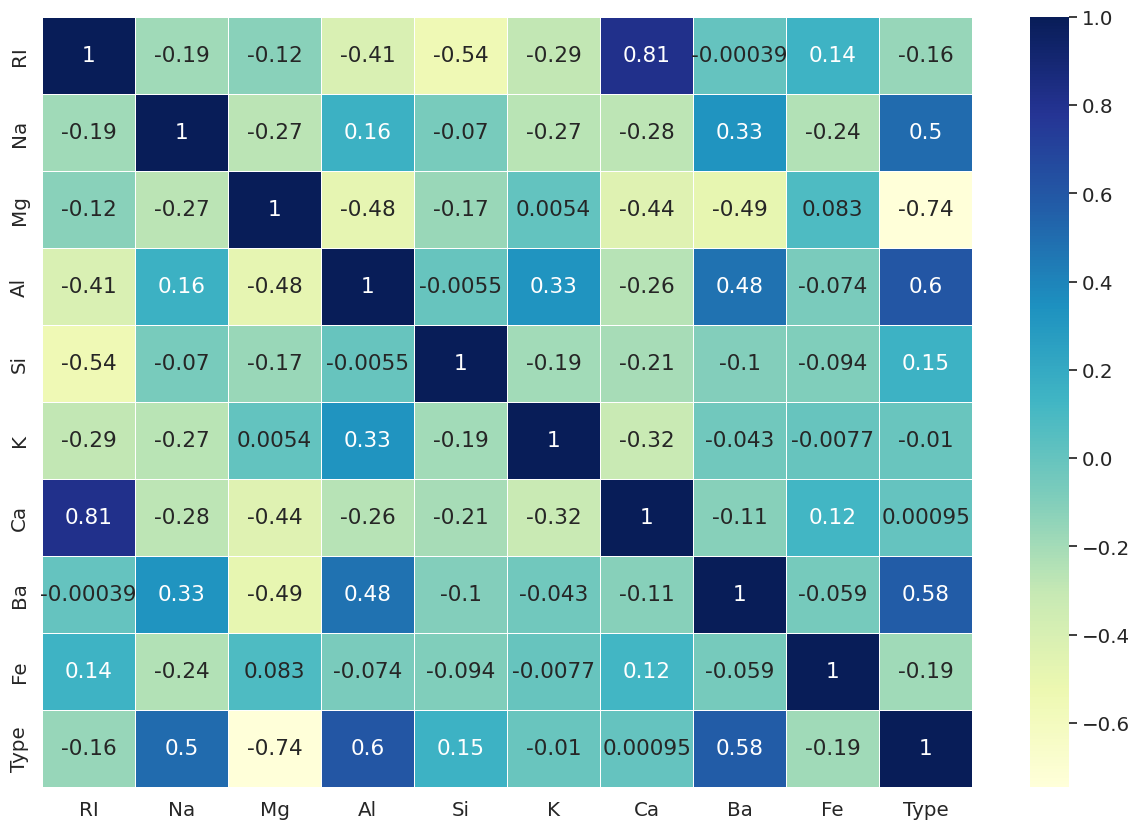

In [ ]:
plt.subplots(figsize=(15,10))
sns.heatmap(glass_df.corr(),cmap='YlGnBu',annot=True, linewidth=.5)

                     P1    P2    P3    P4    P5   P6    P7   P8   P9
Explained_Variance  3.0  1.66  0.68  0.64  0.21  0.1  0.01  0.0  0.0


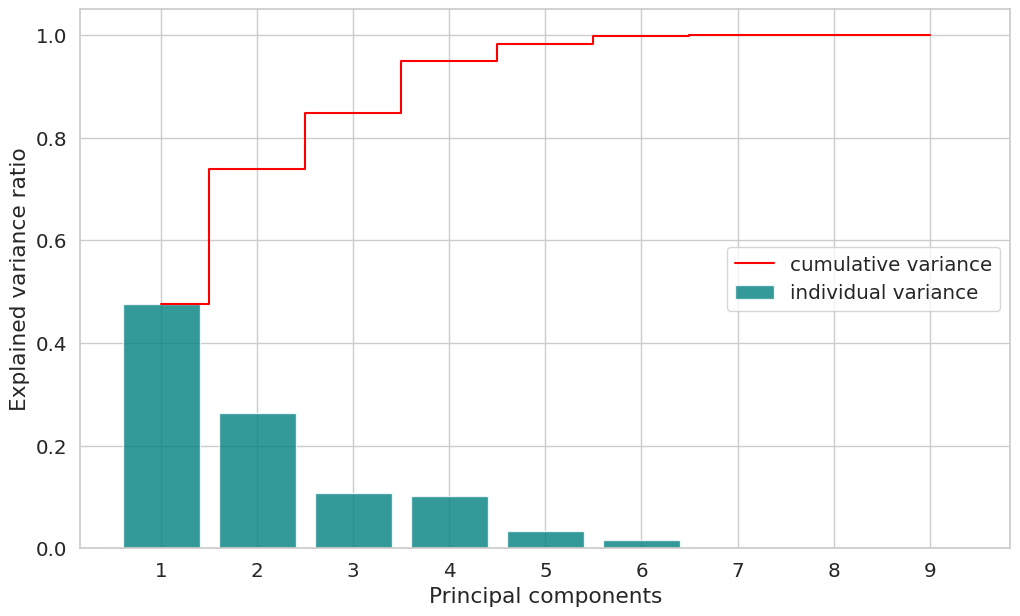

In [ ]:
# Performing PCA
X_var = glass_df[['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']]
pca = PCA(random_state = 1)
pca.fit(X_var)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
var_df = pd.DataFrame(pca.explained_variance_.round(2), index=["P" + str(i) for i in range(1,10)],
                      columns=["Explained_Variance"])
print(var_df.T)
plt.figure(figsize=(12,7))
plt.bar(range(1,len(cum_var_exp)+1), var_exp, align= 'center', label= 'individual variance', color='teal', alpha = 0.8)
plt.step(range(1,len(cum_var_exp)+1), cum_var_exp, where = 'mid' , label= 'cumulative variance', color='red')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.xticks(np.arange(1,len(var_exp)+1,1))
plt.legend(loc='center right')
plt.show()

In [ ]:
pca_red = PCA(n_components=9)
X_reduced = pca_red.fit_transform(X_var)

## Model Development

In [ ]:
# Separating the response (y) and explanatory (x) variables
X = X_reduced
y = glass_df["Type"].values

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform labels in y_train
y_train_encoded = label_encoder.fit_transform(y_train)

# Transform labels in y_test (using the same encoder fitted on y_train)
y_test_encoded = label_encoder.transform(y_test)

# Check the unique values in the transformed y_train and y_test
print(np.unique(y_train_encoded))
print(np.unique(y_test_encoded))

[0 1 2 3 4 5]
[0 1 2 3 4 5]


## Testing Candidate models

In [ ]:
# Bagging
baggingMod = BaggingClassifier(n_estimators = 100, random_state = 1)
baggingMod.fit(X_train,y_train)
y_pred = baggingMod.predict(X_test)
sc = metrics.accuracy_score(y_pred,y_test)

In [ ]:
# Support Vector Machines
svmMod = SVC()
svmMod.fit(X_train,y_train)
y_pred = svmMod.predict(X_test)
sc1 = metrics.accuracy_score(y_pred,y_test)

In [ ]:
# Gradient Boost Classifier
gbmMod = GradientBoostingClassifier(max_depth = 3, n_estimators = 100, learning_rate = 0.05, random_state = 1)
gbmMod.fit(X_train,y_train)
y_pred = gbmMod.predict(X_test)
sc2 = metrics.accuracy_score(y_pred,y_test)

In [ ]:
# Decision Tree
DecTree = tree.DecisionTreeClassifier()
DecTree.fit(X_train, y_train)
y_pred = DecTree.predict(X_test)
sc3 = metrics.accuracy_score(y_pred,y_test)

In [ ]:
# Random Forest
RandFor = RandomForestClassifier(max_depth = 3, min_samples_split=2, n_estimators = 50, random_state = 1)
RandFor.fit(X_train, y_train)
y_pred = RandFor.predict(X_test)
sc4 = metrics.accuracy_score(y_pred,y_test)

In [ ]:
# AdaBoost Classification
adaMod = AdaBoostClassifier(n_estimators = 100, random_state = 1)
adaMod.fit(X_train,y_train)
y_pred = adaMod.predict(X_test)
sc5 = metrics.accuracy_score(y_pred,y_test)

In [ ]:
print(gbmMod.feature_importances_)
print(DecTree.feature_importances_)
print(RandFor.feature_importances_)

[0.24007804 0.17714694 0.03510318 0.10917178 0.08786223 0.07987601
 0.10007087 0.03652749 0.13416347]
[0.23327152 0.22782428 0.0594868  0.10384438 0.07555736 0.04383695
 0.05570423 0.0418728  0.15860168]
[0.17997247 0.28334584 0.03379501 0.15457986 0.07363822 0.13939752
 0.03977996 0.02844361 0.06704751]


In [ ]:
# Compare accuracy of models
pd.DataFrame(data=[['Bagging',sc],['Support Vector Machine',sc1],['Gradient Boost',sc2],
                             ['Decision Tree',sc3],['Random Forest',sc4],['AdaBoost',sc5]],
                                 columns=['Model','Accuracy'])

,Model,Accuracy
0,Bagging,0.703704
1,Support Vector Machine,0.703704
2,Gradient Boost,0.666667
3,Decision Tree,0.666667
4,Random Forest,0.685185
5,AdaBoost,0.314815


In [ ]:
#Hyperparameter tuning

tuned_parameters = [{'kernel': ['rbf','linear'], 'gamma': [0.001, 0.01, 0.1, 10],
                     'C': [0.001, 0.01, 0.1, 1, 10]}]
grid = GridSearchCV(SVC(), tuned_parameters, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)
print("Best parameters set found on development set:")
print()
print(grid.best_params_)

Best parameters set found on development set:

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [ ]:
#Running final model

model = grid.best_estimator_
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
metrics.accuracy_score(y_pred,y_test)

0.7592592592592593

## Model Performance

Text(269.25, 0.5, 'predicted label')

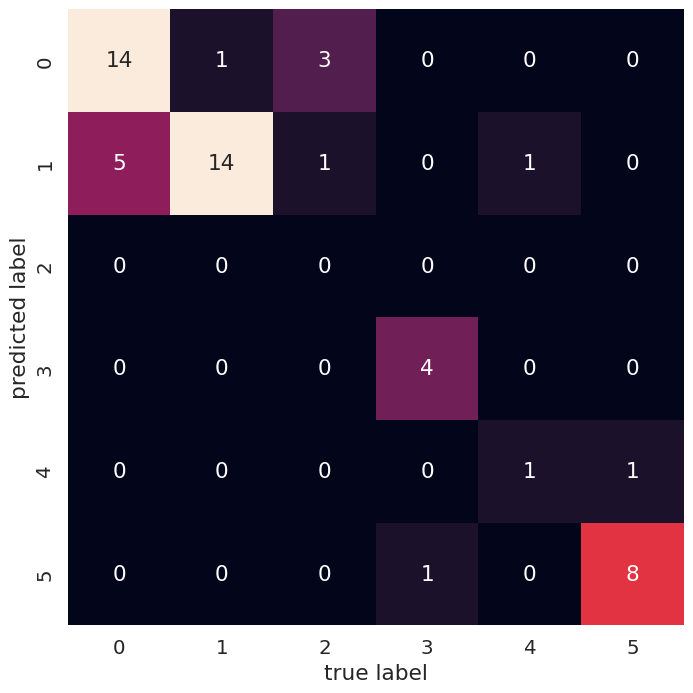

In [ ]:
# Let's plot the confusion matrix
mat = confusion_matrix(y_test, y_pred)
plt.subplots(figsize=(12,8))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.78      0.74      0.76        19
           2       0.67      0.93      0.78        15
           3       0.00      0.00      0.00         4
           5       1.00      0.80      0.89         5
           6       0.50      0.50      0.50         2
           7       0.89      0.89      0.89         9

    accuracy                           0.76        54
   macro avg       0.64      0.64      0.64        54
weighted avg       0.72      0.76      0.73        54



In [ ]:
glass_df.shape

(214, 10)

In [ ]:
cor=glass_df.corr()
cor.style.background_gradient(cmap='Purples')

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


In [ ]:
x=glass_df.iloc[:,0:10]
y=glass_df['Type']

In [ ]:
xtr,xts,ytr,yts=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
xtr

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
16,1.51784,12.68,3.67,1.16,73.11,0.61,8.70,0.0,0.00,1
135,1.51789,13.19,3.90,1.30,72.33,0.55,8.44,0.0,0.28,2
122,1.51687,13.23,3.54,1.48,72.84,0.56,8.10,0.0,0.00,2
22,1.51736,12.78,3.62,1.29,72.79,0.59,8.70,0.0,0.00,1
80,1.51592,12.86,3.52,2.12,72.66,0.69,7.97,0.0,0.00,2
...,...,...,...,...,...,...,...,...,...,...
67,1.52152,13.05,3.65,0.87,72.32,0.19,9.85,0.0,0.17,1
192,1.51623,14.20,0.00,2.79,73.46,0.04,9.04,0.4,0.09,7
117,1.51708,13.72,3.68,1.81,72.06,0.64,7.88,0.0,0.00,2
47,1.52667,13.99,3.70,0.71,71.57,0.02,9.82,0.0,0.10,1


In [ ]:
mod=RandomForestClassifier()

In [ ]:
mod.fit(xtr,ytr)

RandomForestClassifier()

In [ ]:
pred=mod.predict(xts)
print(pred)

[7 1 2 6 5 2 2 2 1 2 1 2 3 2 2 7 2 1 3 3 5 2 7 7 2 1 7 1 2 2 1 1 2 2 2 3 1
 3 2 7 2 6 2]


In [ ]:
# Accuracy Checking.
from sklearn.metrics import accuracy_score

In [ ]:
acc=accuracy_score(yts,pred)
print("Accuracy is:",acc*100)

Accuracy is: 100.0


In [ ]:
# Evalution Metrics
from sklearn.metrics import confusion_matrix

In [ ]:
# Confuse Matrix
c=confusion_matrix(yts,pred)
print("Confusion Matrix is: \n",c)

Confusion Matrix is: 
 [[ 9  0  0  0  0  0]
 [ 0 19  0  0  0  0]
 [ 0  0  5  0  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  6]]


In [ ]:
#End of Assignemnt

## Additional Notes:

1. Explain Bagging and Boosting methods. How is it different from each other.
2. Explain how to handle imbalance in the data.

1.Explain Bagging and Boosting methods. How is it different from each other.

**Bagging (Bootstrap Aggregating):

Bagging involves training multiple base learners independently on different subsets of the training data. These subsets are typically created by sampling the training data with replacement (bootstrap sampling). Each base learner learns from a different perspective of the data, which helps to reduce variance and prevent overfitting. In bagging, the final prediction is typically made by averaging (for regression) or taking a vote (for classification) among the predictions of all the base learners. Boosting:

**Boosting, on the other hand, involves training base learners sequentially, where each subsequent learner focuses on the mistakes made by the previous ones. In boosting, each base learner is trained to correct the errors of the combined ensemble of all previous learners. Boosting algorithms assign weights to the training instances and focus more on the instances that were misclassified by previous models. This way, boosting algorithms tend to give more weight to difficult examples, leading to potentially better performance. Popular boosting algorithms include AdaBoost (Adaptive Boosting), Gradient Boosting Machines (GBM), XGBoost, and LightGBM.

Key Differences:

Independence: In bagging, the base learners are trained independently of each other, while in boosting, the base learners are trained sequentially, with each subsequent learner focusing on the mistakes of the previous ones. Weighting of Instances: Boosting assigns weights to training instances to focus on difficult examples, while bagging treats all instances equally. Final Prediction: In bagging, the final prediction is typically made by averaging or voting among the predictions of all base learners, whereas in boosting, the final prediction is a weighted sum of the predictions of all base learners.

2.Explain how to handle imbalance in the data.

Handling imbalanced data is crucial in machine learning tasks, especially in classification problems where the classes are not represented equally. Here are some common techniques to handle imbalance in the data:

Resampling Techniques:

Undersampling: Randomly remove instances from the majority class to balance the class distribution. This can potentially lead to loss of information, so it's important to carefully choose which instances to remove. Oversampling: Randomly duplicate instances from the minority class or generate synthetic samples to increase its representation. Techniques like SMOTE (Synthetic Minority Over-sampling Technique) create synthetic samples based on the feature space. Hybrid Methods: Combining undersampling and oversampling techniques can sometimes yield better results. For example, SMOTE followed by undersampling the majority class. Algorithmic Techniques:

Class Weights: Many algorithms allow assigning different weights to classes. Increasing the weight of the minority class or decreasing the weight of the majority class can help the algorithm to pay more attention to the minority class during training. Algorithm Selection: Some algorithms are inherently robust to class imbalance. For example, tree-based algorithms like Random Forest and Gradient Boosting are less affected by class imbalance compared to linear models like Logistic Regression. Ensemble Methods: Ensemble methods like Bagging and Boosting can also help in handling imbalance by combining multiple models trained on different subsets of data or by focusing on misclassified instances (in boosting). Evaluation Metrics:

Use appropriate evaluation metrics: Accuracy is not a suitable metric when dealing with imbalanced data because it can be misleading. Instead, metrics like precision, recall, F1-score, ROC-AUC, and PR-AUC are more informative. These metrics provide a better understanding of the model's performance, especially its ability to correctly classify the minority class.